# Week 8 - Logistic Regression and Clustering
### Data Science Bootcamp Fall 2024


---





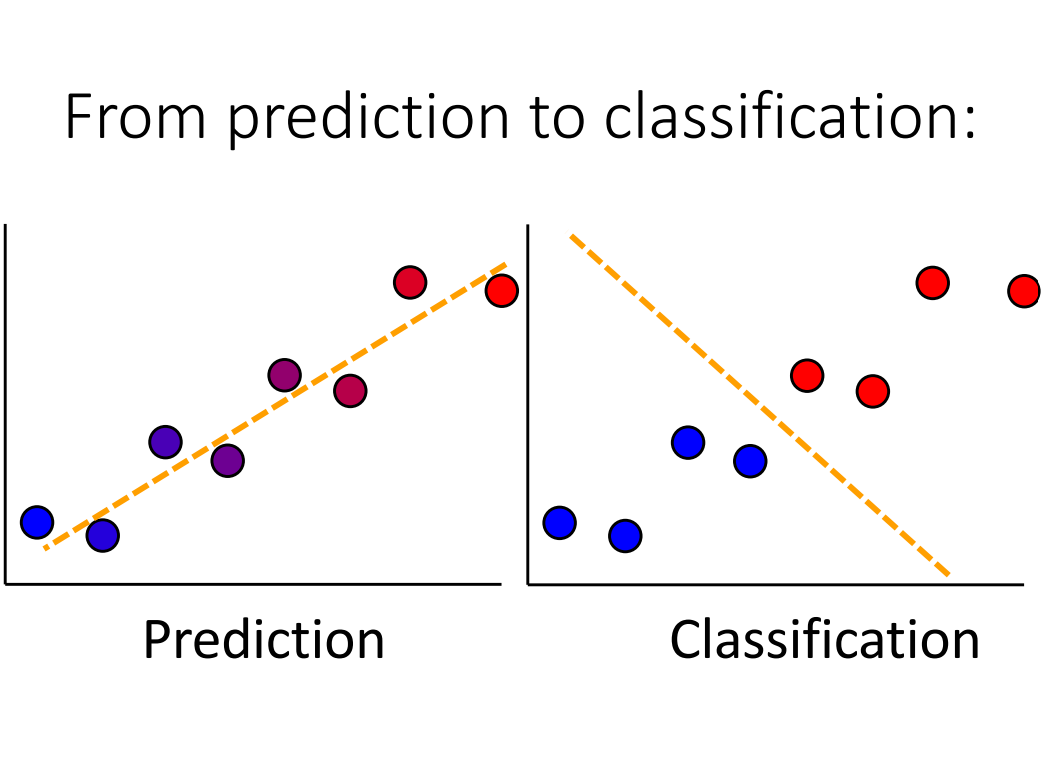

## Classification:

Suppose we have a series of data points {(𝐱𝟏
, 𝑦1
), (𝐱𝟐
, 𝑦2
), … , (𝐱𝐧, 𝑦𝑛)} and there is some (unknown)
relationship between 𝐱𝐢
and 𝑦𝑖
.

• Classification: The output variable 𝑦 is constrained to be ∈ 1, 2, ⋯ , 𝐾

• Binary classification: The output variable 𝑦 is constrained to be ∈ 0, 1

## Recap


Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `x` predictor.


```
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.intercept_, linear_reg.coef_)
```




**Coefficient interpretation:** A 1-unit increase in `x` is associated with a `β1`-unit change in `y`.

**Intercept interpretation:** When `x = 0`, the estimated value of `y` is $\beta_0$


<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, `but what about when we want to predict membership in a class or category?`

## Toy Example

` You want to predict if a candidate will get hired by a company or not `

Things you might consider when making this decision -
1. `GPA`
2. `Experience`
3. `Portfolio`
4. `Skills`
5. `Education` ...



## Lets plot GPA against Hired?

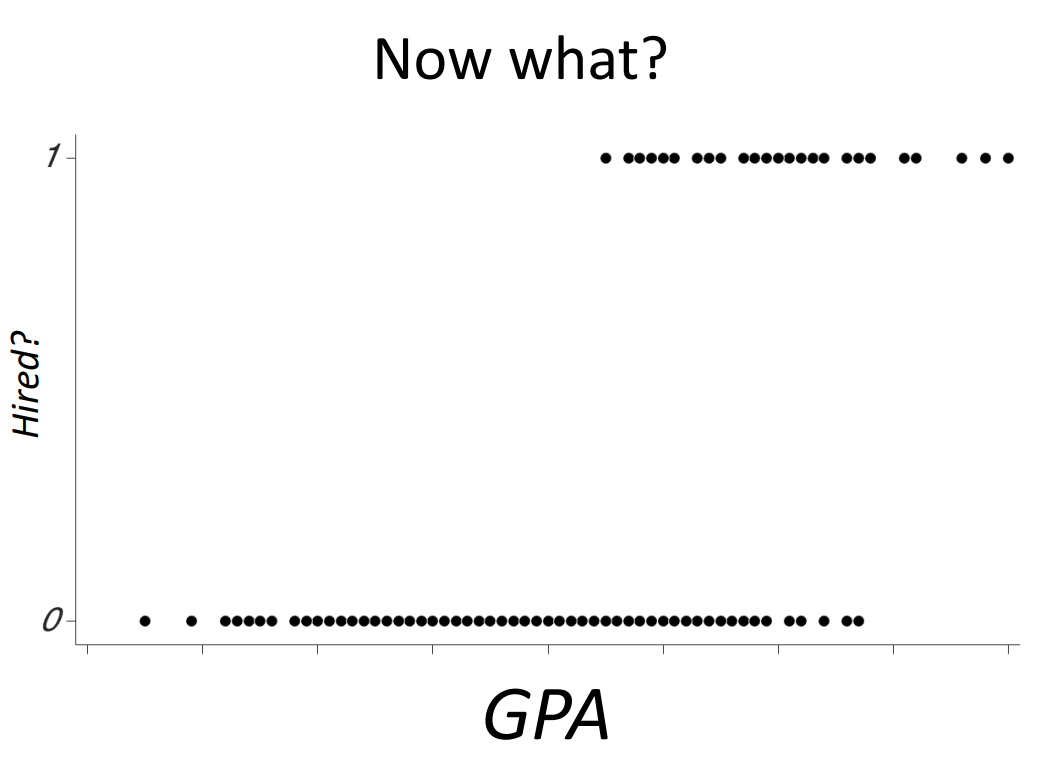

## Can we apply a Linear Regression model?

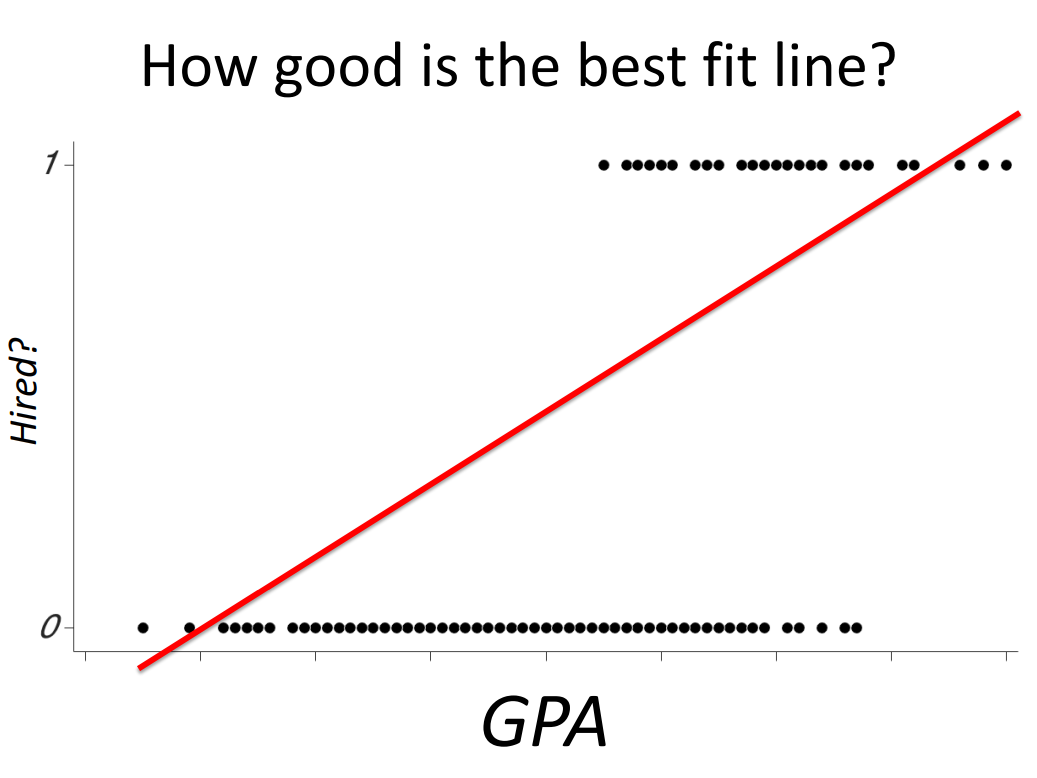

# `Just because we can, doesn't mean we should!`

Issues with Linear Regression in this case -
1. It assumes that the data is distributed normally. Here, the outcomes are either `0 or 1 (binary)`. Definitely, not normal!

2. Effect of unit change is assumed to be constant

3. Linear Regressions is unbounded


Hence, we need something else in this case.




---

## Logistic Regression

* A `nonlinear model` that links the predictor and the outcomes
* We model the `odds` of an outcome happening



> odds = $\frac{p}{1-p}$

eg. if p = 0.5  -> odds = 1:1

eg. if p = 0.75 -> odds = 3:1


## How does Logistic Regression work?

Linear regression: Continuous response is modeled as a linear combination of the features.

$$z = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the `logit function`.

Probability is sometimes written as π.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1



`We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?`


- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson. Hint: use softmax function.

## Lets fit a Logistic Regression model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [4]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [5]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11482147]]), array([-6.00880515]))

Text(0, 0.5, 'household')

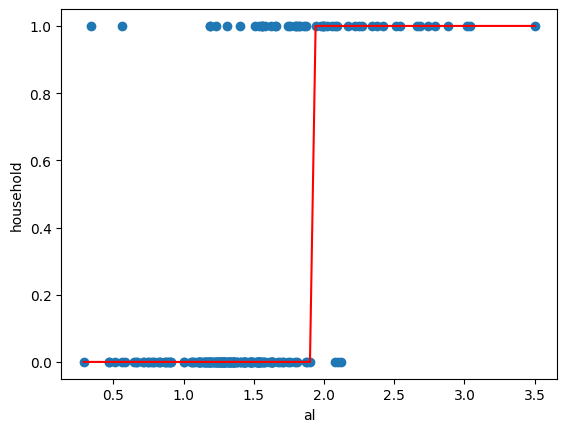

In [7]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [8]:
logreg.predict_proba(X)[:15]

array([[0.99397328, 0.00602672],
       [0.99296478, 0.00703522],
       [0.98948976, 0.01051024],
       [0.98948976, 0.01051024],
       [0.98811176, 0.01188824],
       [0.98613609, 0.01386391],
       [0.98613609, 0.01386391],
       [0.98525808, 0.01474192],
       [0.98173207, 0.01826793],
       [0.98116498, 0.01883502],
       [0.98058065, 0.01941935],
       [0.97806048, 0.02193952],
       [0.97738205, 0.02261795],
       [0.97522152, 0.02477848],
       [0.97522152, 0.02477848]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [9]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [10]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006027
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007035
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011888
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935929
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950822
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967641
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969535


Text(0, 0.5, 'household')

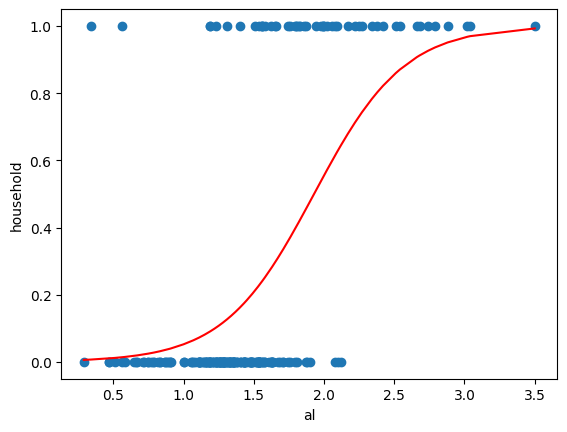

In [11]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Interpreting the coeffecients

**Interpretation:** A 1-unit increase in `al` is associated with a 2.01-unit increase in the log odds of `household`.

Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

## How good are our predictions?

In [12]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [13]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy
#(TN+TP)/(TN+TP+FN+FP)

np.float64(0.8691588785046729)

In [14]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision
#(TP)/(TN+TP)


np.float64(0.896551724137931)

In [15]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall
#(TP)/(TP+FN)


np.float64(0.5098039215686274)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [17]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [18]:
recall_score(y,pred)

0.5098039215686274

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

**Some of the most useful metrics for addressing these problems are:**
    
- **Classification accuracy/error**
  - Classification accuracy is the percentage of correct predictions (higher is better).
  - Classification error is the percentage of incorrect predictions (lower is better).
  - Easiest classification metric to understand.
- **Confusion matrix**
  - Gives you a better understanding of how your classifier is performing.
  - Allows you to calculate sensitivity, specificity, and many other metrics that might match your business objective better than accuracy.
  - Precision and recall are good for balancing misclassification costs.



The good news is that these are readily available in Python and R, and are usually easy to calculate once you know about them.

## How do we know what threshold to set?

- ROC Curve Construction: For each threshold value, calculate the TPR and FPR.
Plot these values on a graph with TPR on the y-axis and FPR on the x-axis. This generates the ROC curve.

- Interpretation: The ROC curve provides a visual representation of the trade-off between sensitivity (TPR) and specificity (1 - FPR) for different threshold values. A curve that is closer to the top-left corner indicates better performance, as it represents higher sensitivity and lower false positive rate across various threshold settings.

- Area Under the Curve (AUC): AUC is calculated by measuring the area under the ROC curve. AUC provides a single scalar value summarizing the model's performance. Higher AUC values indicate better discrimination ability of the model across all threshold settings, with 1 being perfect and 0.5 indicating no discrimination ability (random guessing).

In summary, the ROC curve helps in evaluating the performance of a classification model by illustrating its ability to discriminate between positive and negative classes across different threshold settings.

Practice Questions:
1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model

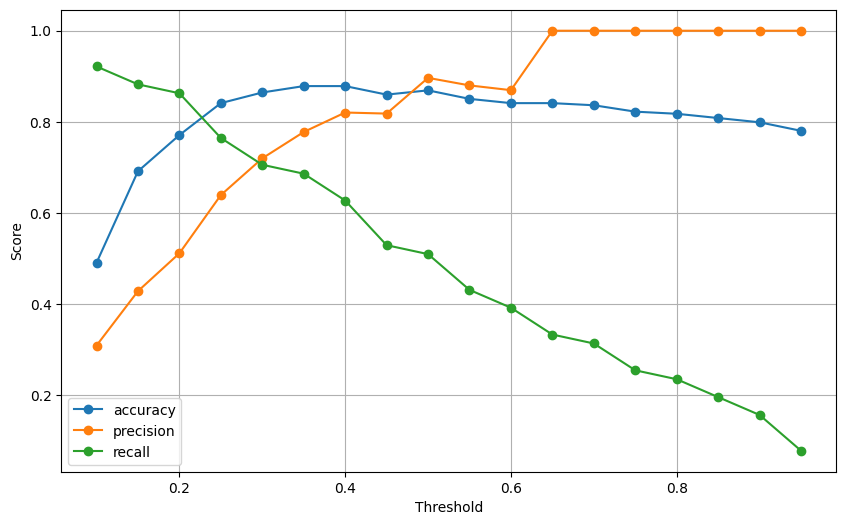

In [28]:
thresholds = np.arange(0.1, 1.0, 0.05)

y_prob = logreg.predict_proba(X)[:, 1]

metrics = {'accuracy': [], 'precision': [], 'recall': []}
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    metrics['accuracy'].append(accuracy_score(y, y_pred))
    metrics['precision'].append(precision_score(y, y_pred))
    metrics['recall'].append(recall_score(y, y_pred))


plt.figure(figsize=(10, 6))
for metric, values in metrics.items():
    plt.plot(thresholds, values, marker='o', label=metric)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

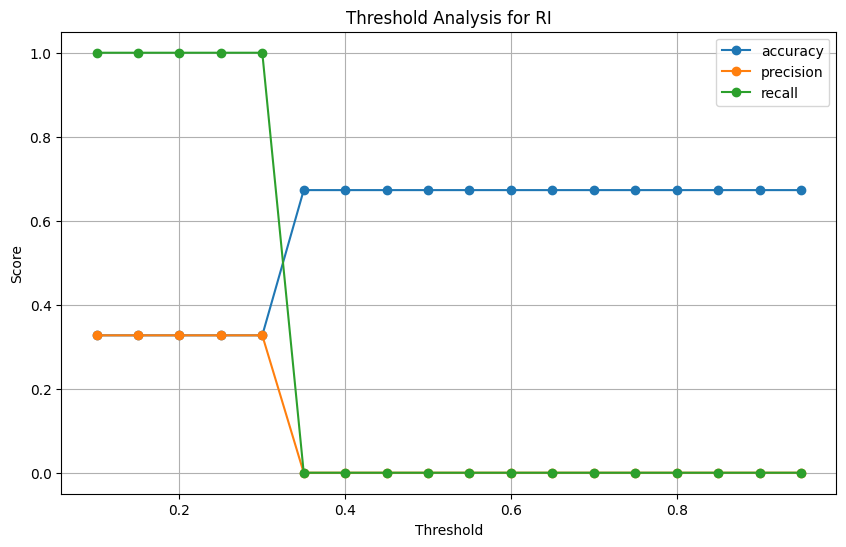

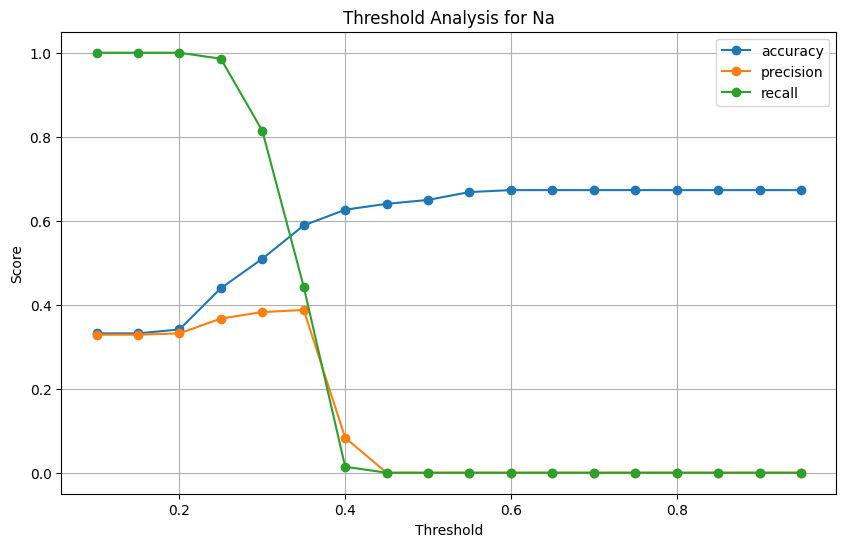

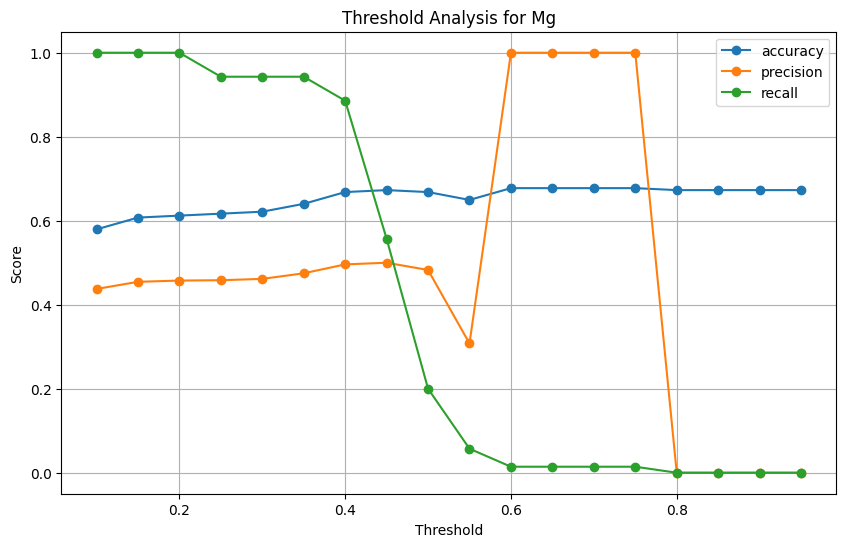

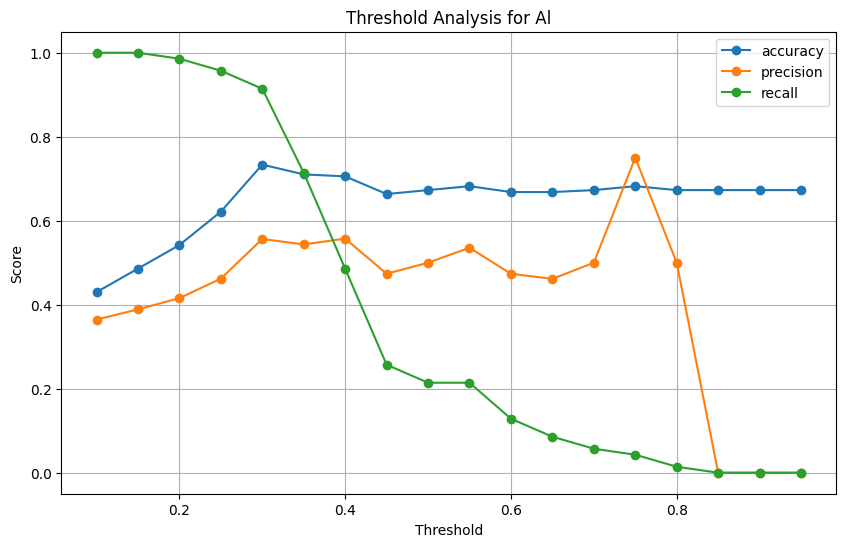

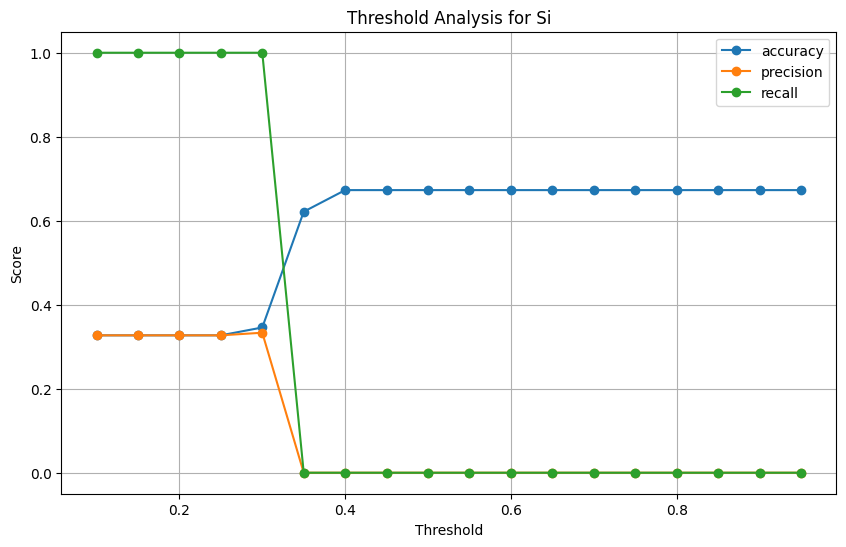

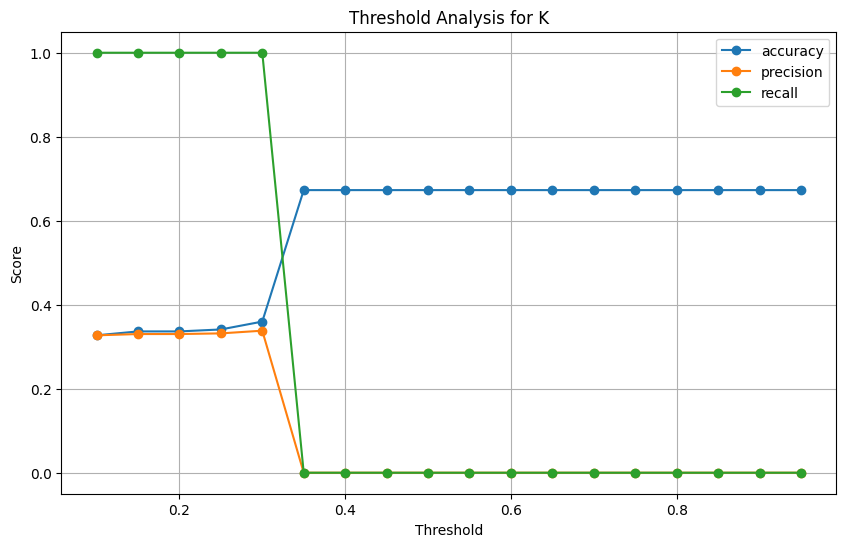

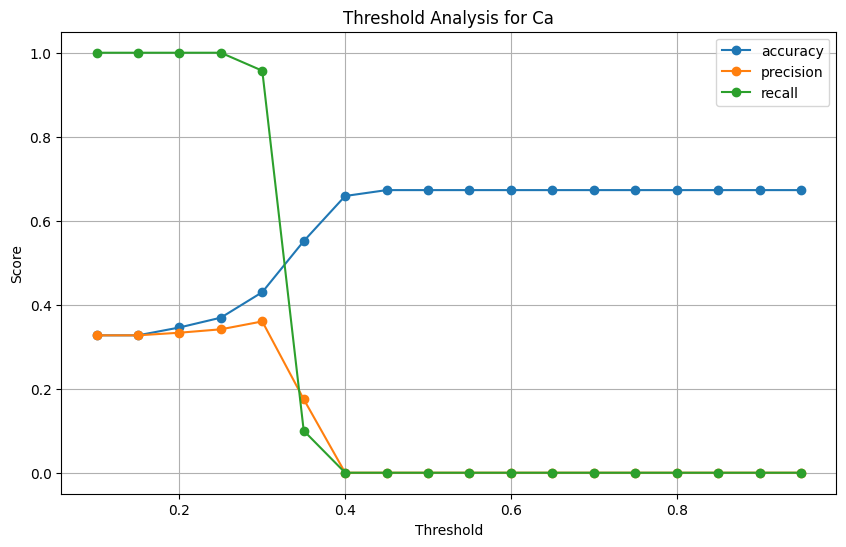

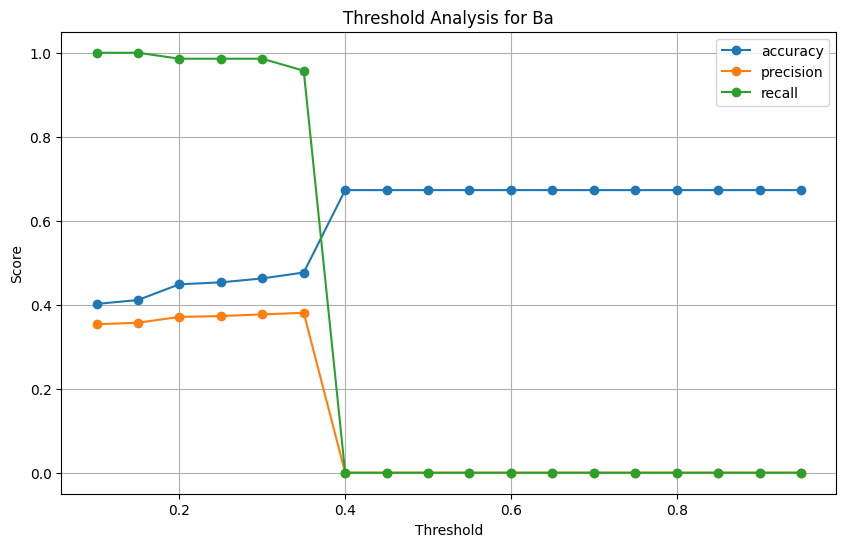

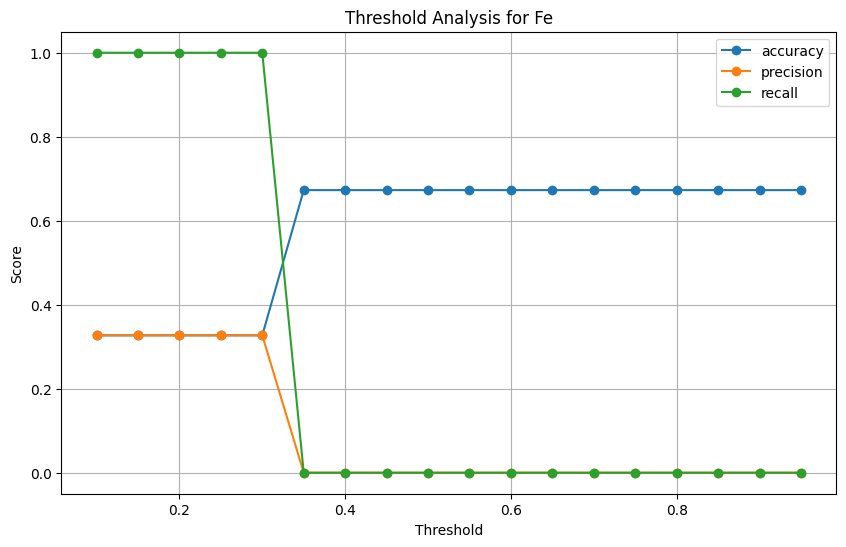

In [34]:
def onefeature(feature_name):
    X = glass[[feature_name]].values
    y = (glass['Type'] == 1).astype(int)  
    
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X, y)
    
    thresholds = np.arange(0.1, 1.0, 0.05)
    y_prob = logreg.predict_proba(X)[:, 1]
    
    metrics = {'accuracy': [], 'precision': [], 'recall': []}
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        metrics['accuracy'].append(accuracy_score(y, y_pred))
        metrics['precision'].append(precision_score(y, y_pred, zero_division=0))
        metrics['recall'].append(recall_score(y, y_pred, zero_division=0))
    
    plt.figure(figsize=(10, 6))
    for metric, values in metrics.items():
        plt.plot(thresholds, values, marker='o', label=metric)
    
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Threshold Analysis for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

for feature in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    onefeature(feature)

Model with all features:
Accuracy: 0.8154
Precision: 0.7333
Recall: 0.5789


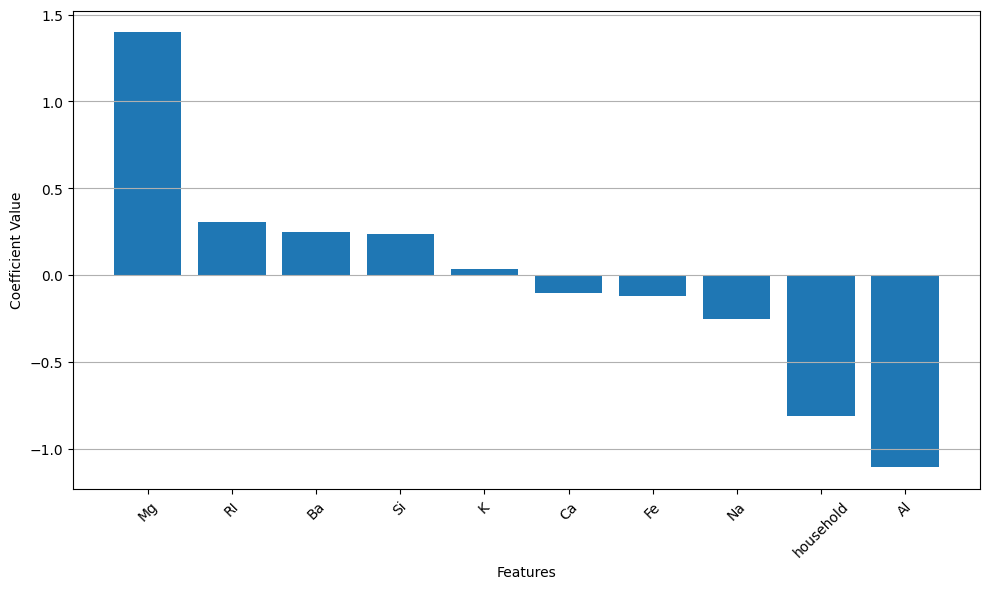

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def allfeatures():
    X = glass.drop('Type', axis=1)
    y = (glass['Type'] == 1).astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train_scaled, y_train)
    
    y_pred = logreg.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("Model with all features:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Feature importance
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': logreg.coef_[0]
    })
    coef_df = coef_df.sort_values('Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(coef_df['Feature'], coef_df['Coefficient'])
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    return logreg, scaler, X_test_scaled, y_test

model, scaler, X_test_scaled, y_test = allfeatures()

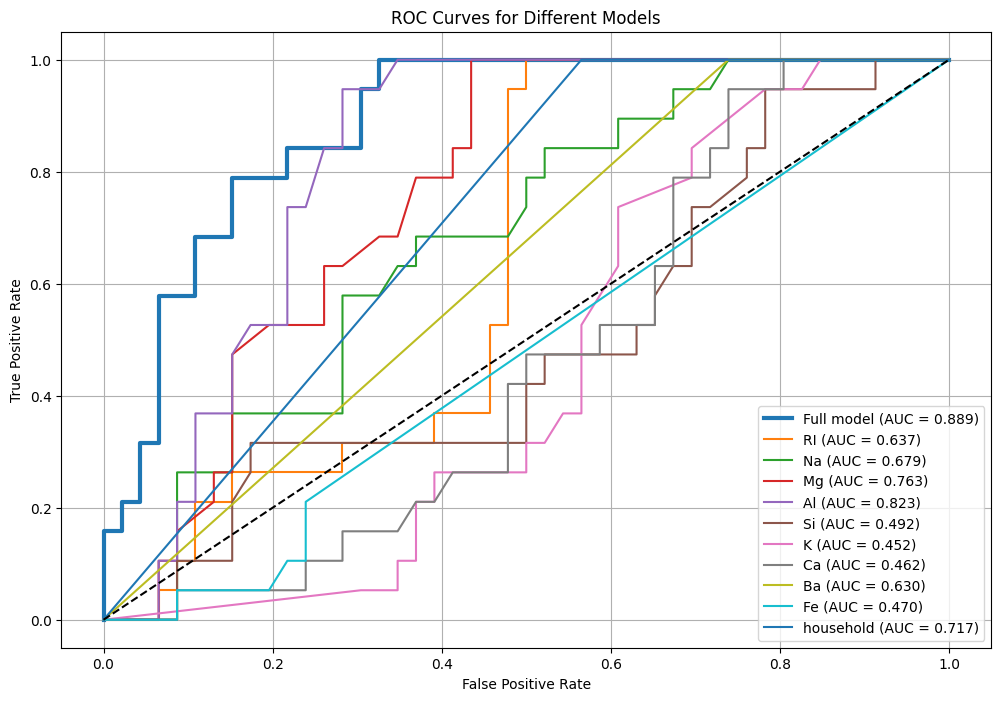

In [38]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves():
    plt.figure(figsize=(12, 8))
    
    y_full_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr_full, tpr_full, _ = roc_curve(y_test, y_full_prob)
    roc_auc_full = auc(fpr_full, tpr_full)
    plt.plot(fpr_full, tpr_full, label=f'Full model (AUC = {roc_auc_full:.3f})', linewidth=3)
    
    for feature in glass.drop('Type', axis=1).columns:
        X_single = glass[[feature]].values
        y = (glass['Type'] == 1).astype(int)
        
        X_train, X_test, y_train, y_test_single = train_test_split(X_single, y, test_size=0.3, random_state=42)
        
        scaler_single = StandardScaler()
        X_train_scaled = scaler_single.fit_transform(X_train)
        X_test_scaled_single = scaler_single.transform(X_test)
        
        single_model = LogisticRegression(random_state=42)
        single_model.fit(X_train_scaled, y_train)
        
        y_single_prob = single_model.predict_proba(X_test_scaled_single)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_single, y_single_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_roc_curves()

# Clustering

(Unsupervised Learning)

---
---

### Helpful uses for clustering:
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

## K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3-4 until your centroids converge.

# Metrics for assessing your clusters

**Inertia** -- sum of squared errors for each cluster
- low inertia = dense clusters
- Ranges from -inf to +inf

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated


### Inertia

sum of squared errors for each cluster

- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


### Silhouette Score

measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

* <https://en.wikipedia.org/wiki/Silhouette_(clustering)>


### Demo

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


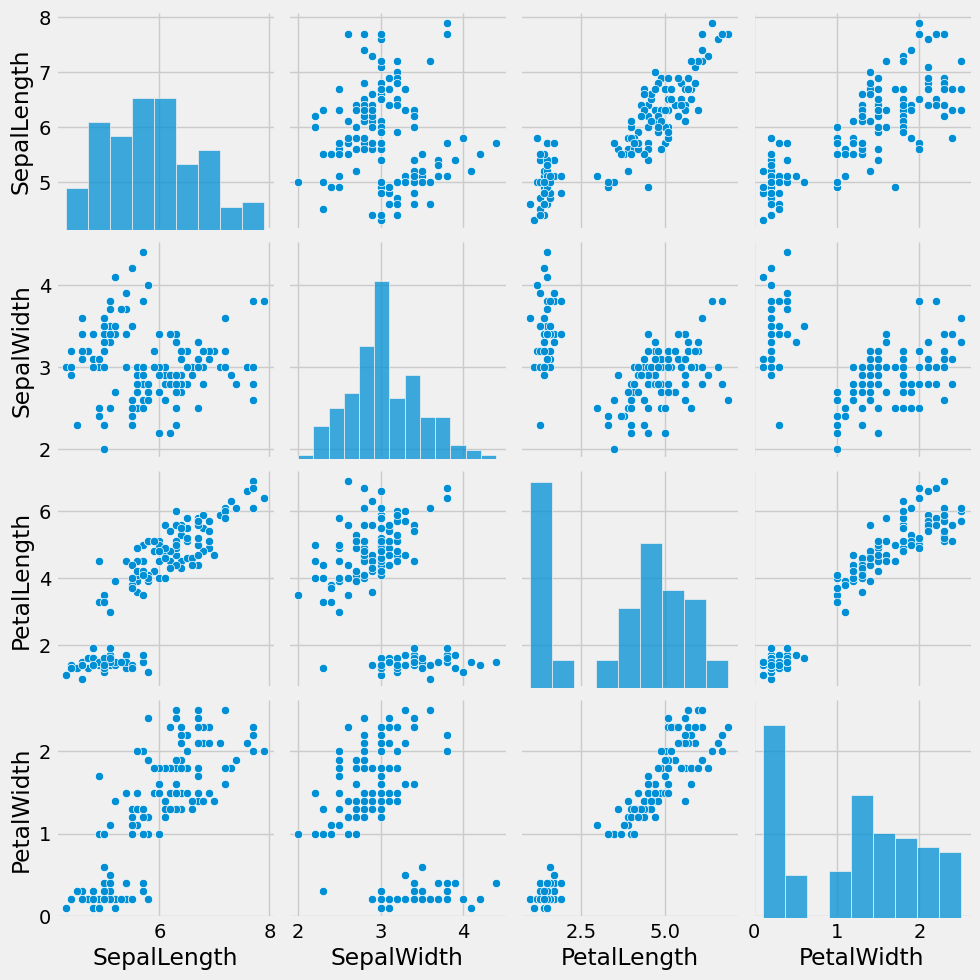

In [ ]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

Next, since each of our features have different units and ranges, let's do some preprocessing:

In [ ]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [ ]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now that we've formatted our data and understand its structures, we can finally go ahead and cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [ ]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [ ]:
print(labels,centroids)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1] [[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.545      0.36333333 0.6620339  0.65666667]]


In [ ]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

np.float64(0.6294675561906644)

How to choose Value of k?

In [ ]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))



Text(0, 0.5, 'Score')

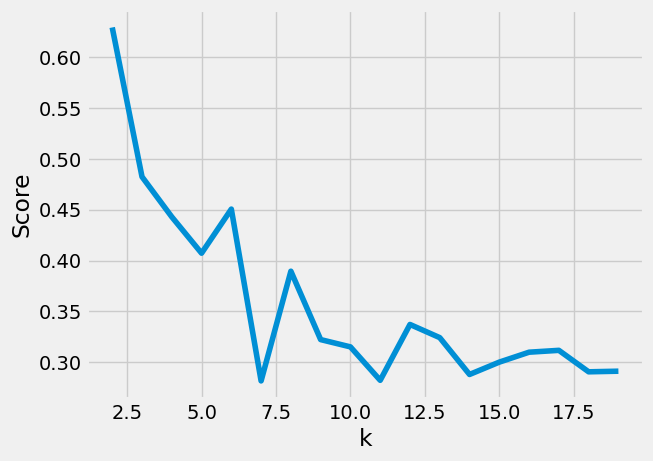

In [ ]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [ ]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

Text(0, 0.5, 'Inertia')

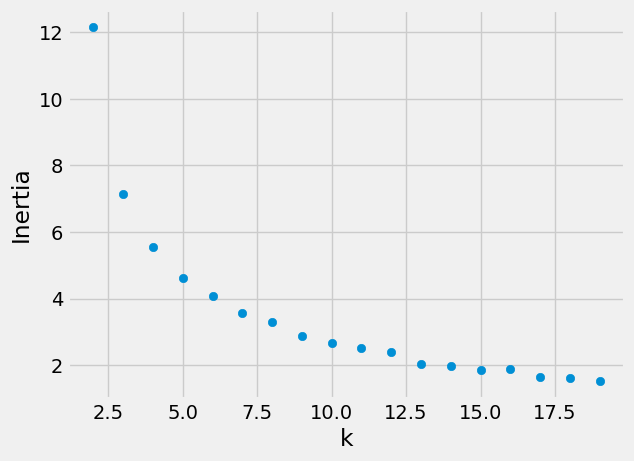

In [ ]:
plt.scatter(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

The curve we obtain is called the Elbow curve. We want to stop changing the value of k when the distance between two k values does not change much.


...and we're done! You've completed your first clustering analysis.

Let's see how it looks. First, let's put the labels columns into our dataframe

In [ ]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,5
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,5


Let's plot each cluster in a different color. Seaborn has a 'hue' parameter we can use for this.

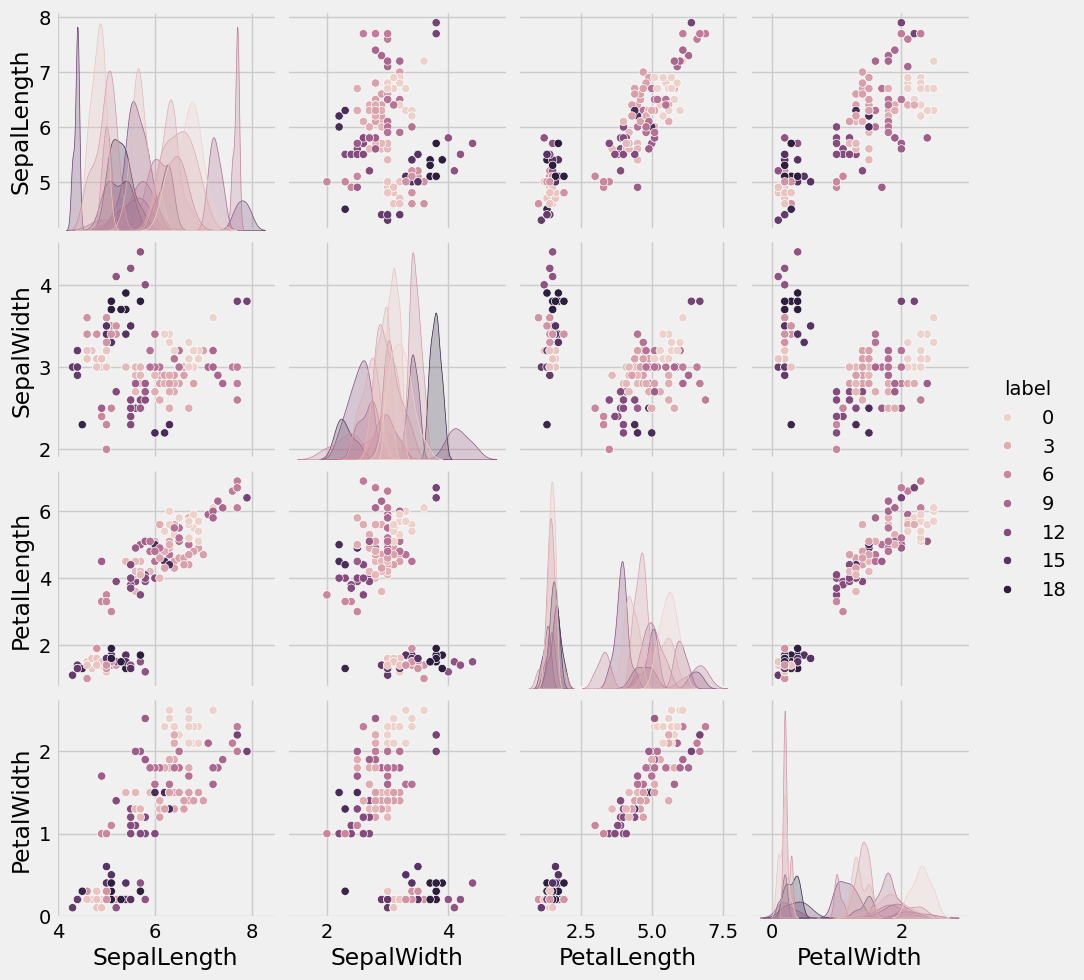

In [ ]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

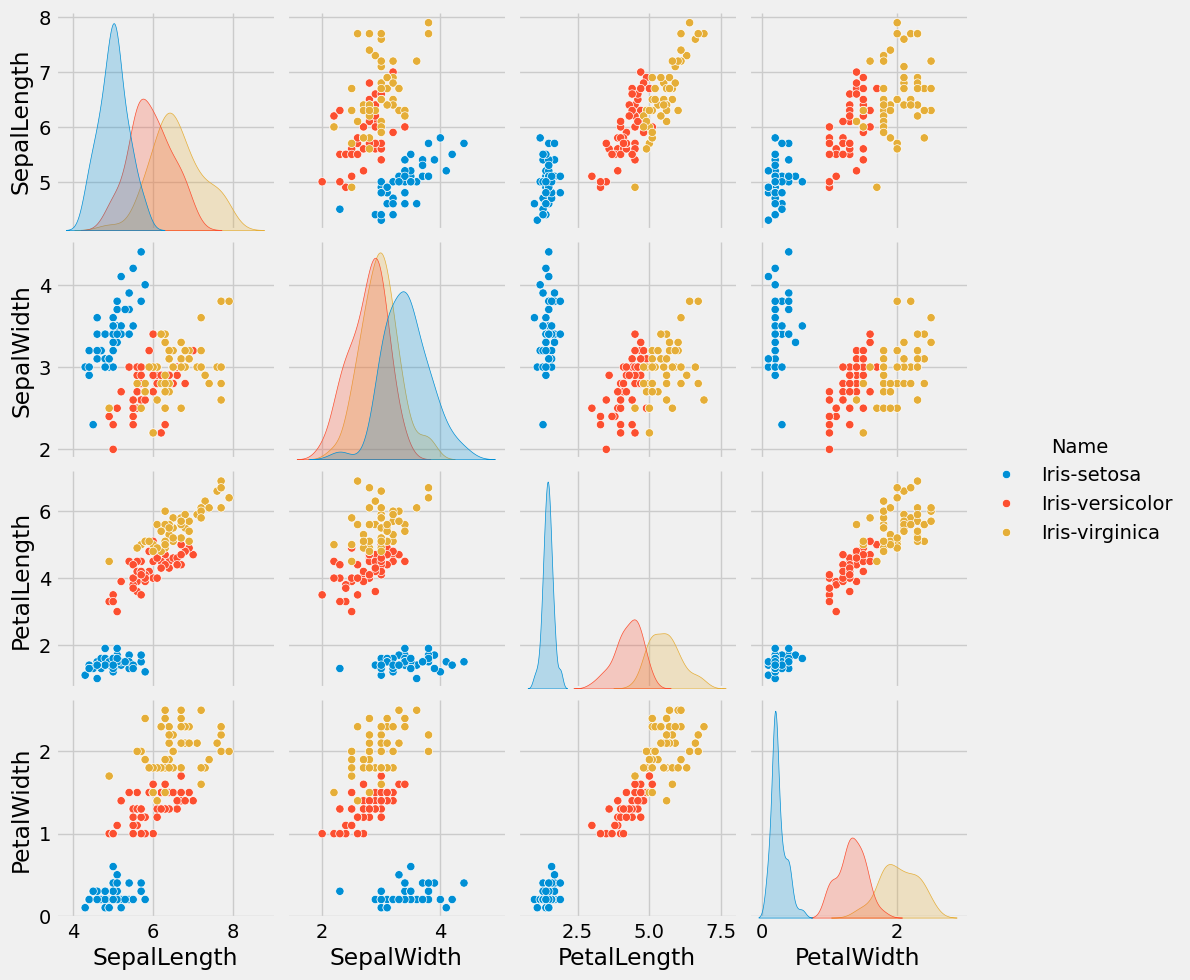

In [ ]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

### Practice questions:
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


2. Repeat the following exercise for food nutrients dataset


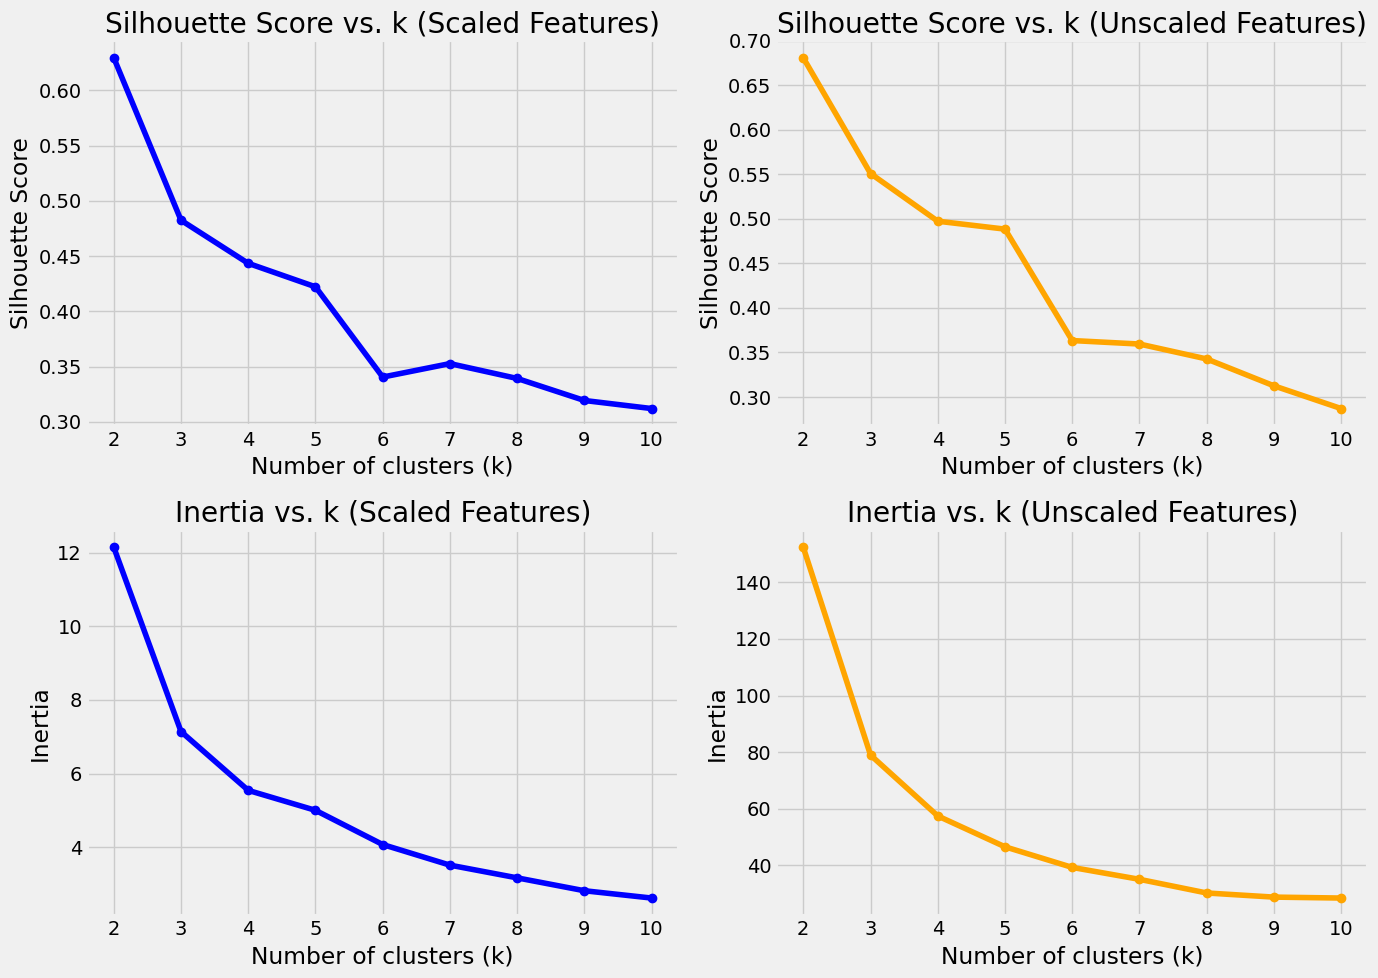

best k for scales 2
best k for unscaled 2


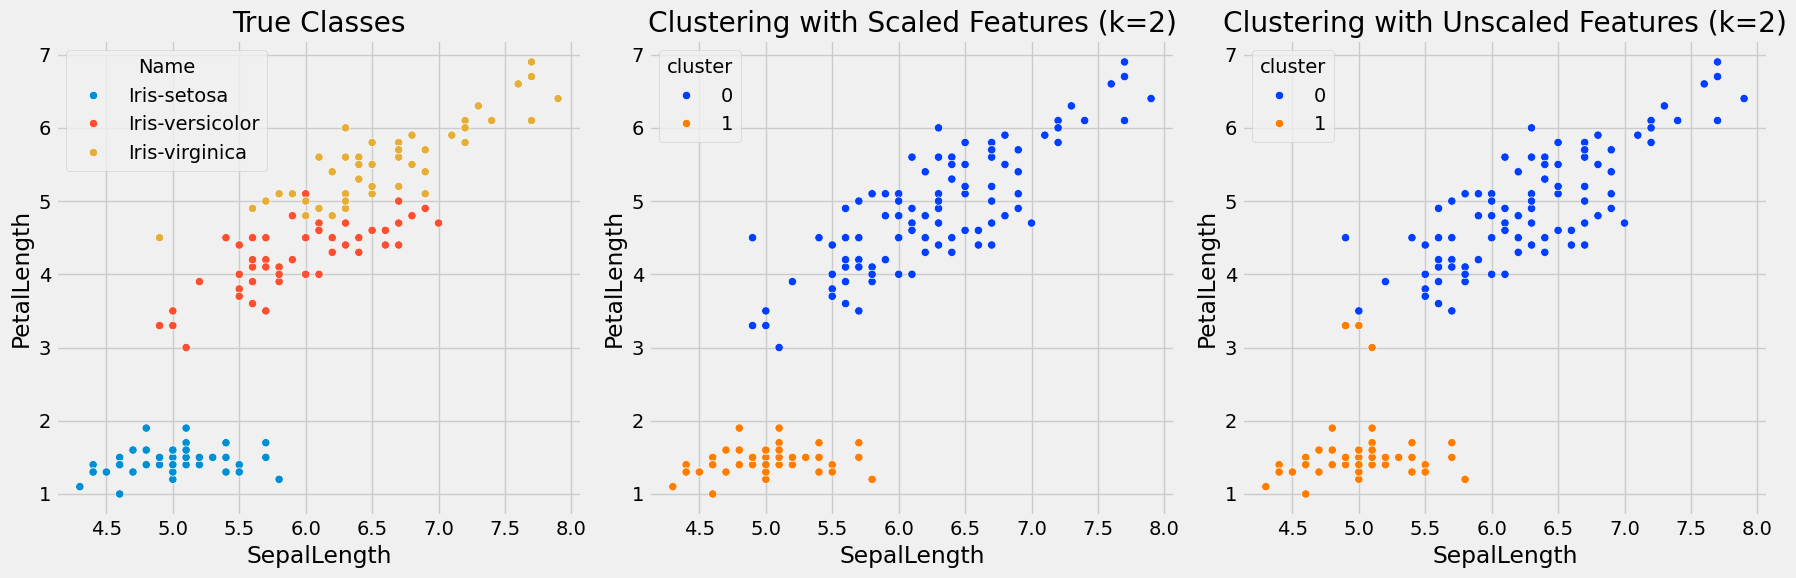

In [43]:
X_unscaled = df[cols].values

k_range = range(2, 11)
silhouette_scaled = []
inertia_scaled = []
silhouette_unscaled = []
inertia_unscaled = []

for k in k_range:
    kmeans_scaled = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans_scaled.fit(X_scaled)
    labels_scaled = kmeans_scaled.labels_
    
    silhouette_scaled.append(metrics.silhouette_score(X_scaled, labels_scaled))
    inertia_scaled.append(kmeans_scaled.inertia_)
    

    kmeans_unscaled = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans_unscaled.fit(X_unscaled)
    labels_unscaled = kmeans_unscaled.labels_
    
    silhouette_unscaled.append(metrics.silhouette_score(X_unscaled, labels_unscaled))
    inertia_unscaled.append(kmeans_unscaled.inertia_)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(list(k_range), silhouette_scaled, 'o-', color='blue')
axes[0, 0].set_title('Silhouette Score vs. k (Scaled Features)')
axes[0, 0].set_xlabel('Number of clusters (k)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].grid(True)

axes[0, 1].plot(list(k_range), silhouette_unscaled, 'o-', color='orange')
axes[0, 1].set_title('Silhouette Score vs. k (Unscaled Features)')
axes[0, 1].set_xlabel('Number of clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].grid(True)

axes[1, 0].plot(list(k_range), inertia_scaled, 'o-', color='blue')
axes[1, 0].set_title('Inertia vs. k (Scaled Features)')
axes[1, 0].set_xlabel('Number of clusters (k)')
axes[1, 0].set_ylabel('Inertia')
axes[1, 0].grid(True)

axes[1, 1].plot(list(k_range), inertia_unscaled, 'o-', color='orange')
axes[1, 1].set_title('Inertia vs. k (Unscaled Features)')
axes[1, 1].set_xlabel('Number of clusters (k)')
axes[1, 1].set_ylabel('Inertia')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

scaled_best_k = list(k_range)[np.argmax(silhouette_scaled)]
unscaled_best_k = list(k_range)[np.argmax(silhouette_unscaled)]

print(f"best k for scales {scaled_best_k}")
print(f"best k for unscaled {unscaled_best_k}")

kmeans_best_scaled = cluster.KMeans(n_clusters=scaled_best_k, random_state=42)
kmeans_best_scaled.fit(X_scaled)
df_scaled_result = df.copy()
df_scaled_result['cluster'] = kmeans_best_scaled.labels_

kmeans_best_unscaled = cluster.KMeans(n_clusters=unscaled_best_k, random_state=42)
kmeans_best_unscaled.fit(X_unscaled)
df_unscaled_result = df.copy()
df_unscaled_result['cluster'] = kmeans_best_unscaled.labels_

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='SepalLength', y='PetalLength', hue='Name', data=df, ax=axes[0])
axes[0].set_title('True Classes')

sns.scatterplot(x='SepalLength', y='PetalLength', hue='cluster', palette='bright', data=df_scaled_result, ax=axes[1])
axes[1].set_title(f'Clustering with Scaled Features (k={scaled_best_k})')

sns.scatterplot(x='SepalLength', y='PetalLength', hue='cluster', palette='bright', data=df_unscaled_result, ax=axes[2])
axes[2].set_title(f'Clustering with Unscaled Features (k={unscaled_best_k})')

plt.tight_layout()
plt.show()

1. inertia decreases as k increases, and sihouette scre peaks at the optial k
2. if you dont scale the features, th eones with larger value sskew the clustering and make predictions worse
3. there is a right k which gives the best results, but here the mathematicl analysis and commond sense suggest different k values

## Further reading

- The [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a great summary of many other clustering algorithms.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) is one popular alternative.
- This [PyData talk](https://www.youtube.com/watch?v=Mf6MqIS2ql4) is good overview of clustering, different algorithms, and how to think about the quality of your clusters.

# Thank you!